In [ ]:
# Copyright (c) 2020-2021 CertifAI Sdn. Bhd.
# 
# This program is part of OSRFramework. You can redistribute it and/or modify
# it under the terms of the GNU Affero General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
# 
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Affero General Public License for more details.
# 
# You should have received a copy of the GNU Affero General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

# Logistic Regression

Logistic regression is commonly used for binary classification.
First, let us prepare a dataset that has only 2 classes as its labels.

## 1 - Import necessary packages

Let's first import all the packages that you will need during this assignment.

- **numpy** is the main package for scientific computing with Python.
- **matplotlib** is a library to plot graphs in Python.
- **sklearn** features various algorithms of machine learning in Python.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

## 2 - Load dataset

Here we will load the IRIS dataset from **scikit-learn**. We will be utilizing `iris.data` and `iris.target` as usual for our features and values.

In [2]:
# TODO: Replace {} with your solution to load the iris dataset
iris = datasets.load_iris()

As usual `dir(iris)` shows the attributes of the iris datasets.
- `iris.data.shape` shows the shape of the data.
- `iris.target_names` shows the classes that we want to classify.
- `iris.feature_names` shows the name of features that we are training.

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Check the available classes/labels in IRIS dataset

In [7]:
np.unique(iris.target)

array([0, 1, 2])

Remove the data entries with label 2.

In [8]:
# TODO: Replace {} with your solution to remove the data entries with label 2
idx = iris.target != 2

In [9]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
print(idx)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


Load features to "data" and load targets to "target".

In [11]:
# TODO: Replace {} with your solution to load features to "data"
data = iris.data[idx].astype(np.float32)

# TODO: Replace {} with your solution to load targets to "target"
target = iris.target[idx].astype(np.float32)

The target has only 2 classes, 0 or 1

In [12]:
print(target)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


If you plot out all the new datapoints which consists of 2 classes, you can see that the dataset can be well separated linearly.

Text(0, 0.5, 'sepal width (cm)')

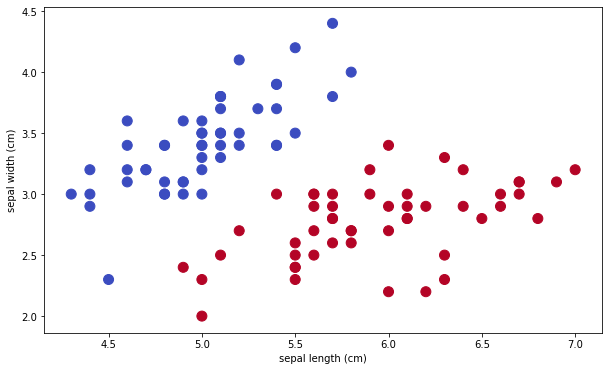

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap=plt.cm.coolwarm, s=100)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

Split the dataset into 70% training set and 30% test set.

In [14]:
# TODO: Replace {} with your solution to split the dataset into 70% training set and 30% test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    data, target, test_size=0.3, random_state=123
)

In [15]:
X_train.shape, y_train.shape

((70, 4), (70,))

In [16]:
X_test.shape, y_test.shape

((30, 4), (30,))

## 3 - Logistic Regression

Select `LogisticRegression` from `sklearn.linear_model` to use the logistic regression model.

In [17]:
# TODO: Replace {} to implement logistic regression model
model = LogisticRegression(solver="liblinear")

> `solver` is to specify which algorithm to use in the optimization problem, by default is 'lbfgs'. In this case, we use 'liblinear' algorithm fot the optimization because it works well in small dataset.

In [18]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
predictions = model.predict(X_test)

## 4 - Evaluating Model

Get the classification report.

In [20]:
# TODO: Replace {} with your solution to print the classfication report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Precision** : the percentage of your results which are relevant. $$TP=\frac{TP}{(TP+FP)}$$

**Recall** : the percentage of total relevant results correctly classified by your algorithm.
$$TP=\frac{TP}{(TP+FN)}$$

**F1-score** : conveys the balance between the precision and the recall.
$$F1=2*\frac{Precision * Recall}{Precision + Recall}$$

**macro avg** : the average `F1 score` of each label without considering the proportions of data for each label.
$$MacroAvg = \frac{\sum{F1}}{n}$$   
**weighted avg** : the average of `F1 score` of each label which takes the proportions of data (weights) for each label into considerations.
$$WeightedAvg = \frac{\sum{(w\times F1)}}{n}$$

Get the confusion matrix.

In [21]:
# TODO: Replace {} with your solution to print the confusion matrix
print(confusion_matrix(y_test, predictions))

[[15  0]
 [ 0 15]]


Since our evaluation metrics such as accuracy, precision and recall get 1.00, we can see from confusion matrix that the model has classified correctly without errors. 
- The first row first column indicates all 15 labelled with class 0 was classified correctly by the model into class 0. 
- The first row second column, there is no class 1 classified as class 0.
- The second row first column, there is no class 0 classified as class 1.
- The second row second column indicates all 15 labelled with class 1 was classified correctly by the model into class 1.

# Logistic Regression: Multiclass Classification

Logistic regression can also be tweaked into a multiclass classifier. To attempt this feat, we will be utilizing a concept named **"One-versus-all classification"**. For this example, we are going to reuse the above IRIS dataset for clarification purposes.

In [22]:
X = iris.data
y = iris.target

The basic workings of this algorithm, **"one-versus-all"**, is that for $n$ classes, we will have to train $n$ logistic models, one for each class.<br><br>
Following that, we will try to classify a specific data point by throwing the data point into the $n$ logistic models, and each model will return a **degree of confidence(probability)** that the data point is from its class.<br><br>
Based on the matrix of probabilities of the data point being true in the models, the highest one from class $k$ will be returned and hence will be classified as $k$.<br><br>
Seems like a lot of work, doesn't it? But good news is that we don't have to manually perform these model trainings $n$ times ourselves. The peeps from `sklearn` have already developed a function for this multiclass use case in their class `LogisticRegression`.<br><br>
All we have to do is to pass in params `multi_class='ovr'` into the LogisticRegression model and the model will handle it.<br>
> For `multi_class='ovr'`, the solver `liblinear` is unavailable, hence we will use `lbfgs` as our solver.

In [23]:
X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(X, y, test_size=0.3, random_state=123)

# TODO: Replace {} with your solution to use 'lbfgs' as solver
model = LogisticRegression(multi_class='ovr', solver='lbfgs')

model.fit(X_train2, y_train2)
predictions = model.predict(X_test2)

Visuallizing the performance of the model through `accuracy_score`, `confusion_matrix` and attributes of `classification_report`

In [24]:
print('Accuracy score: ' + str(accuracy_score(y_test2, predictions)), end = '\n\n')
print('Confusion Matrix: \n\n' + str(confusion_matrix(y_test2, predictions)), end='\n\n')
print('Classification Report: \n\n' + str(classification_report(y_test2, predictions)))

Accuracy score: 0.9555555555555556

Confusion Matrix: 

[[18  0  0]
 [ 0 10  0]
 [ 0  2 15]]

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.83      1.00      0.91        10
           2       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



From the confusion matrix, we can see that in the third row second column, there is 2 labelled with class 2 was classified wrongly by the model into class 1. Hence the precision and recall of class 1 is below 1.00, and the overall accuracy of the model is 0.96.

# Exercise: Binary Classification of Breast Cancer dataset

## 1 - Load dataset

In [25]:
# TODO: Replace {} with your solution to load the breast cancer dataset
bcancer = datasets.load_breast_cancer()

In [26]:
dir(bcancer)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [27]:
bcancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [28]:
bcancer.data.shape, bcancer.target.shape

((569, 30), (569,))

Load the features to "data" and load targets to "target".

In [29]:
# TODO: Replace {} with your solution to load the features to "data"
data = bcancer.data.astype(np.float32)

# TODO: Replace {} with your solution to load the targets to "target"
target = bcancer.target.astype(np.float32)

In [30]:
# TODO: Replace {} with your solution to split the dataset into 70% training set and 30% test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    data, target, test_size=0.3, random_state=123
)

## 2 - Logistic Regression

In [31]:
# TODO: Replace {} with your solution to implement logistic regression model
model = LogisticRegression(solver="liblinear")

model.fit(X_train, y_train)

# TODO: Replace {} with your solution to make the prediction using the trained model
predictions = model.predict(X_test)

## 3 - Evaluating Model

In [32]:
# TODO: Replace {} with your solution to print confussion matrix
print(confusion_matrix(y_test, predictions))

[[ 66   2]
 [  1 102]]


From the confusion matrix, we can see that there are 2 labelled with class 0 was classified wrongly into class 1, and 1 labelled with class 1 was classified wrongly into class 0.

In [33]:
# TODO: Replace {} with your solution to print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98        68
         1.0       0.98      0.99      0.99       103

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

